In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import BatchNormalization
#importing machinelearning libraries

In [ ]:
df=pd.read_csv('/content/hospital data analysis.csv')

In [ ]:
df.head()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


In [ ]:
df.dropna()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4
...,...,...,...,...,...,...,...,...,...,...
979,996,68,Male,Hypertension,Medication and Counseling,1000,70,No,Stable,4
980,997,45,Female,Appendicitis,Appendectomy,8000,72,No,Recovered,3
981,998,40,Male,Fractured Leg,Cast and Physical Therapy,3000,72,No,Recovered,4
982,999,78,Female,Heart Attack,Cardiac Catheterization,18000,74,Yes,Stable,2


In [ ]:
df.isnull()

,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
979,False,False,False,False,False,False,False,False,False,False
980,False,False,False,False,False,False,False,False,False,False
981,False,False,False,False,False,False,False,False,False,False
982,False,False,False,False,False,False,False,False,False,False


In [ ]:
label_encoders={}

In [ ]:
for column in ["Gender", "Condition"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
X = df.drop(columns=["Patient_ID", "Condition"])
y = df["Condition"]  # droping rows and coloumns  missing null values in dataset

**Visualization**

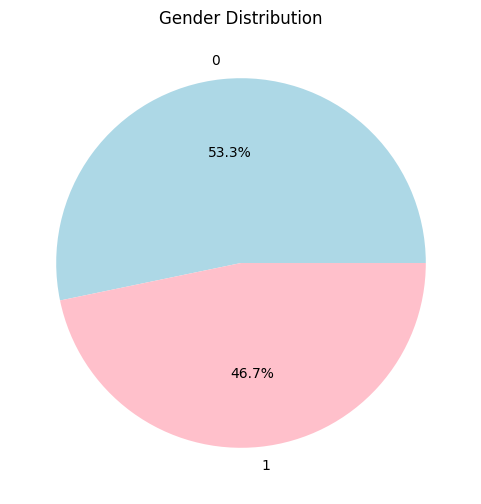

In [ ]:
plt.figure(figsize=(6, 6))
df["Gender"].value_counts().plot.pie(autopct='%1.1f%%', colors=["lightblue", "pink"])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()  #56 percent female and 46 percent males
            #0- females,1-males


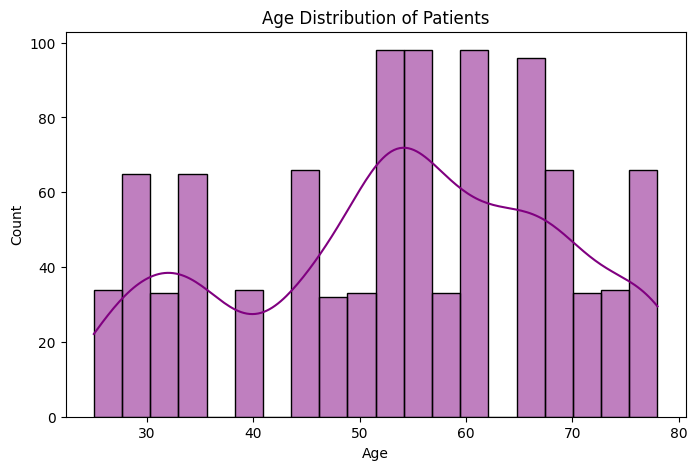

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="purple")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()    #hisplot of count of patients on basis of their age

<ipython-input-18-23d71ffb171e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Condition"].value_counts().index, y=df["Condition"].value_counts().values, palette="viridis")


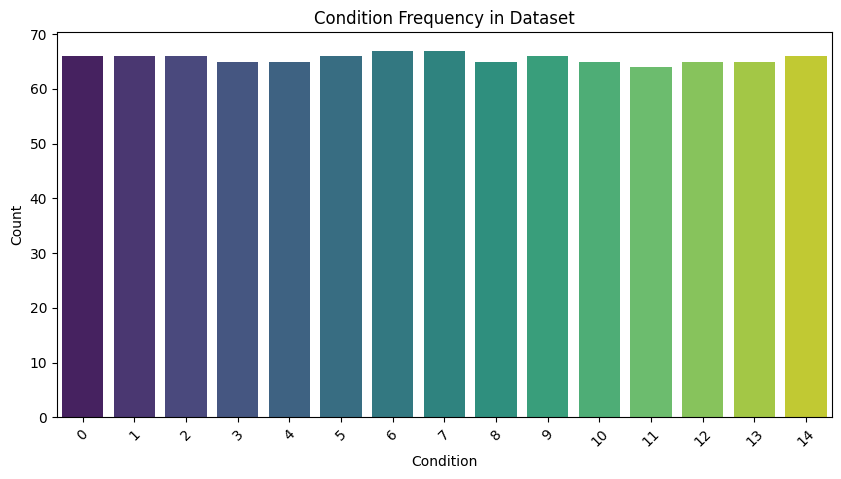

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Condition"].value_counts().index, y=df[""].value_counts().values, palette="viridis")
plt.title("Condition Frequency in Dataset")
plt.xticks(rotation=45)
plt.xlabel("Condition")
plt.ylabel("Count")
plt.show()  #count of patients on basis of disease

<ipython-input-20-34b5c4384869>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Gender"], y=df["Age"], palette="pastel")


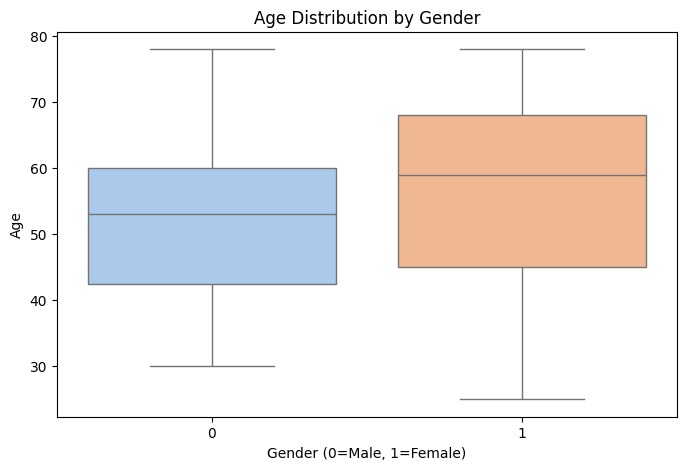

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Gender"], y=df["Age"], palette="pastel")
plt.title("Age Distribution by Gender")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.ylabel("Age")
plt.show()   #genderwise boxplot analysis

<ipython-input-24-0cf753cf0f55>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["Condition"], y=df["Age"], palette="magma")


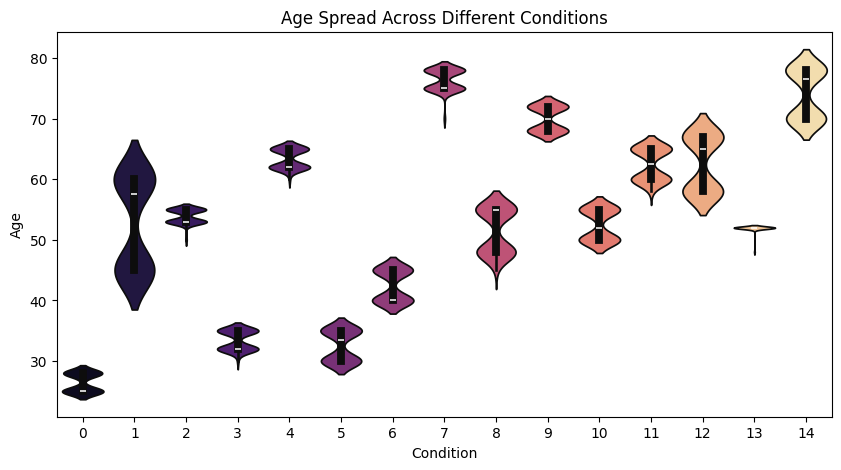

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=df["Condition"], y=df["Age"], palette="magma")
plt.title("Age Spread Across Different Conditions")
plt.xlabel("Condition")
plt.ylabel("Age")
plt.show()

<ipython-input-101-650c68439868>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Procedure"], palette="pastel")


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Angioplasty'),
  Text(1, 0, 'Insulin Therapy'),
  Text(2, 0, 'X-Ray and Splint'),
  Text(3, 0, 'CT Scan and Medication'),
  Text(4, 0, 'Surgery and Chemotherapy')])

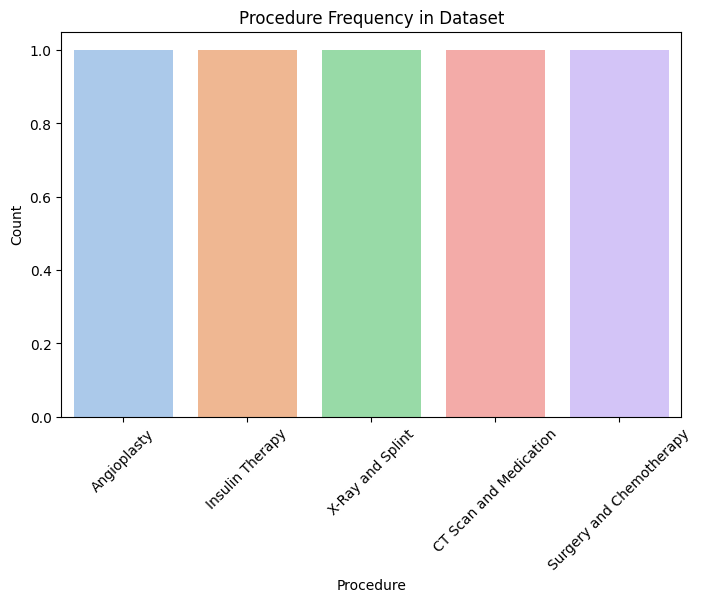

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Procedure"], palette="pastel")
plt.title("Procedure Frequency in Dataset")
plt.xlabel("Procedure")
plt.ylabel("Count")
plt.xticks(rotation=45)

<ipython-input-25-109291f6ca84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["Condition"], y=df["Age"], palette="coolwarm", size=4)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 78.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sea

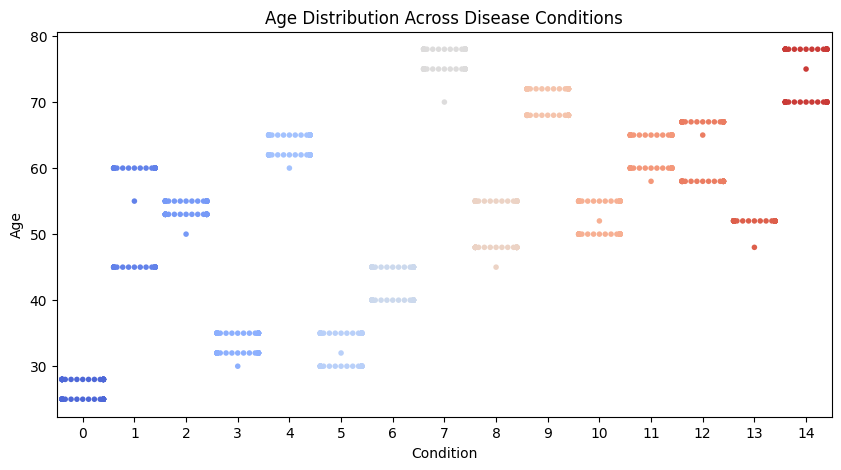

In [ ]:
plt.figure(figsize=(10, 5))
sns.swarmplot(x=df["Condition"], y=df["Age"], palette="coolwarm", size=4)
plt.title("Age Distribution Across Disease Conditions")
plt.xlabel("Condition")
plt.ylabel("Age")
plt.show()

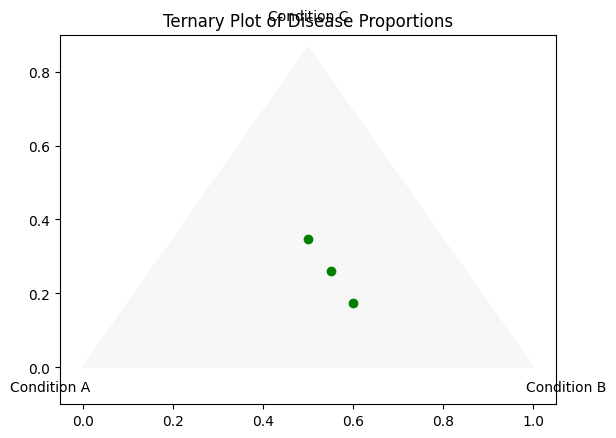

In [ ]:
import matplotlib.pyplot as plt
import ternary

# Step 1: Define Three Medical Conditions (Proportions Must Sum to 1)
data = [
    (0.4, 0.3, 0.3),  # Condition A (40%), B (30%), C (30%)
    (0.5, 0.2, 0.3),  # Condition A (50%), B (20%), C (30%)
    (0.3, 0.4, 0.3)   # Condition A (30%), B (40%), C (30%)
]

# Step 2: Create a Ternary Plot
fig, tax = ternary.figure(scale=1)
tax.scatter(data, marker='o', color='green', label="Disease Proportions")

# Step 3: Labels and Title
tax.set_title("Ternary Plot of Disease Proportions")
tax.left_corner_label("Condition A")
tax.right_corner_label("Condition B")
tax.top_corner_label("Condition C")

# Step 4: Show Plot
plt.show()

In [ ]:

X = df.drop(columns=["Patient_ID", "Condition"])
y = df["Condition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (Rest of your code) ...

In [ ]:
print(X_train.dtypes)
print(X_test.dtypes)

Age                int64
Gender             int64
Procedure          int64
Cost               int64
Length_of_Stay     int64
Readmission       object
Outcome           object
Satisfaction       int64
dtype: object
Age                int64
Gender             int64
Procedure          int64
Cost               int64
Length_of_Stay     int64
Readmission       object
Outcome           object
Satisfaction       int64
dtype: object


In [ ]:
# Define the deep learning model
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=L2(0.01), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=L2(0.01)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0838 - loss: 4.0202 - val_accuracy: 0.1523 - val_loss: 3.2031
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2592 - loss: 2.8851 - val_accuracy: 0.3604 - val_loss: 2.4301
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2802 - loss: 2.5741 - val_accuracy: 0.4315 - val_loss: 2.0856
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3411 - loss: 2.2210 - val_accuracy: 0.2640 - val_loss: 2.1503
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3998 - loss: 1.9810 - val_accuracy: 0.2944 - val_loss: 2.1248
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4036 - loss: 1.9388 - val_accuracy: 0.3452 - val_loss: 2.2108
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4435 - loss: 1.8258 - val_accuracy: 0.4213 - val_loss: 2.0708
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4155 - loss: 1.7798 - val_accuracy: 0.3401 - val_loss

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8484 - loss: 0.8327 
Test Accuracy: 0.8325


In [ ]:

numeric_features = df.drop(columns=["Patient_ID", "Condition", "Procedure"]).select_dtypes(include=np.number).columns

scaler.fit(df[numeric_features])

StandardScaler()